# Notebook 1: Select Denoising Method

## Overview

This notebook helps you **evaluate and select the best denoising method** for your FTIR spectral data. Denoising is a critical preprocessing step that removes random noise while preserving important spectral features.

### What You'll Learn

1. How to load bundled FTIR datasets
2. How to convert transmittance to absorbance
3. How to evaluate multiple denoising methods systematically
4. How to select the best denoising method based on multiple criteria

### Available Denoising Methods

Xpectrass provides 7 denoising methods:
- **Savitzky-Golay (savgol)**: Polynomial smoothing filter
- **Wavelet**: Multi-resolution analysis
- **Median**: Robust to outliers
- **Gaussian**: Smooth filtering
- **Bilateral**: Edge-preserving
- **Wiener**: Adaptive filtering
- **FFT**: Frequency-domain filtering

### Evaluation Metrics

The evaluation process uses three key metrics:
- **SNR (Signal-to-Noise Ratio)**: Higher is better (>10 recommended)
- **Smoothness**: Higher indicates smoother spectra (>1000 recommended)
- **Fidelity**: How well the original signal is preserved (>0.9 recommended)
- **Processing Time**: Time per spectrum in milliseconds

### Expected Output

At the end of this notebook, you'll have:
- Visual comparison of denoising methods
- Quantitative metrics for each method
- Excel file with ranked methods for each polymer type
- Clear recommendation for the best denoising method

---

## Step 1: Load Data and Initialize Pipeline

In [1]:
# One time installation
# %pip install xpectrass

Dataset shape: (3000, 3741)
Number of samples: 3000
Number of features (wavenumbers): 3740
Auto-detected: Transmittance → Converting to Absorbance
########## Plotting Converted Spectra! ##########
Auto-detected: Absorbance


100%|██████████| 3000/3000 [00:03<00:00, 972.11it/s] 


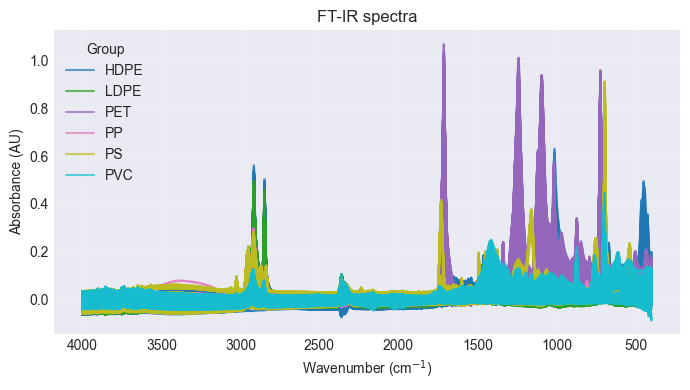

In [2]:
# Import required modules
from xpectrass import FTIRdataprocessing
from xpectrass import load_villegas_camacho_2024_c4

# Load one of the bundled datasets
# You can also use: load_jung_2018(), load_kedzierski_2019(), load_frond_2021(), etc.
dataset = load_villegas_camacho_2024_c4()

print('Dataset shape:', dataset.shape)
print(f'Number of samples: {len(dataset)}')
print(f'Number of features (wavenumbers): {dataset.shape[1] - 1}')  # -1 for label column

# Define the label column (contains polymer type information)
LABEL_COLUMN = "type"

# Initialize the preprocessing pipeline
# This creates an FTIRdataprocessing object that will manage all preprocessing steps
fdp = FTIRdataprocessing(
    df=dataset,
    label_column=LABEL_COLUMN,
)

# Step 1.1: Convert to absorbance (if data is in transmittance mode)
# This step is essential because most preprocessing methods work better with absorbance
# The plot=True option will show a comparison of original vs converted spectra
df_abs = fdp.convert(plot=True)

### What's Happening Here?

The code above:
1. **Loads the dataset**: Using one of the 6 bundled FTIR datasets
2. **Displays dataset information**: Shows the size and structure of your data
3. **Initializes preprocessing**: Creates the pipeline object that will handle all processing steps
4. **Converts to absorbance**: Most FTIR data preprocessing methods work better with absorbance values

**Note**: If your data is already in absorbance mode, the conversion step will automatically detect this and skip the conversion.

---

## Step 2: Evaluate Denoising Methods by Polymer Type

Now we'll systematically evaluate all denoising methods for each polymer type in the dataset. This approach is recommended because different polymer types may respond differently to denoising methods.

Found 6 polymer types: ['HDPE', 'LDPE', 'PET', 'PP', 'PS', 'PVC']

Starting denoising method evaluation for each polymer type...


[1/6] Evaluating polymer type: HDPE
Number of samples for HDPE: 500


denoise eval: 100%|██████████| 50/50 [00:02<00:00, 23.99it/s]


########## Plotting Denoising Evaluation! ##########


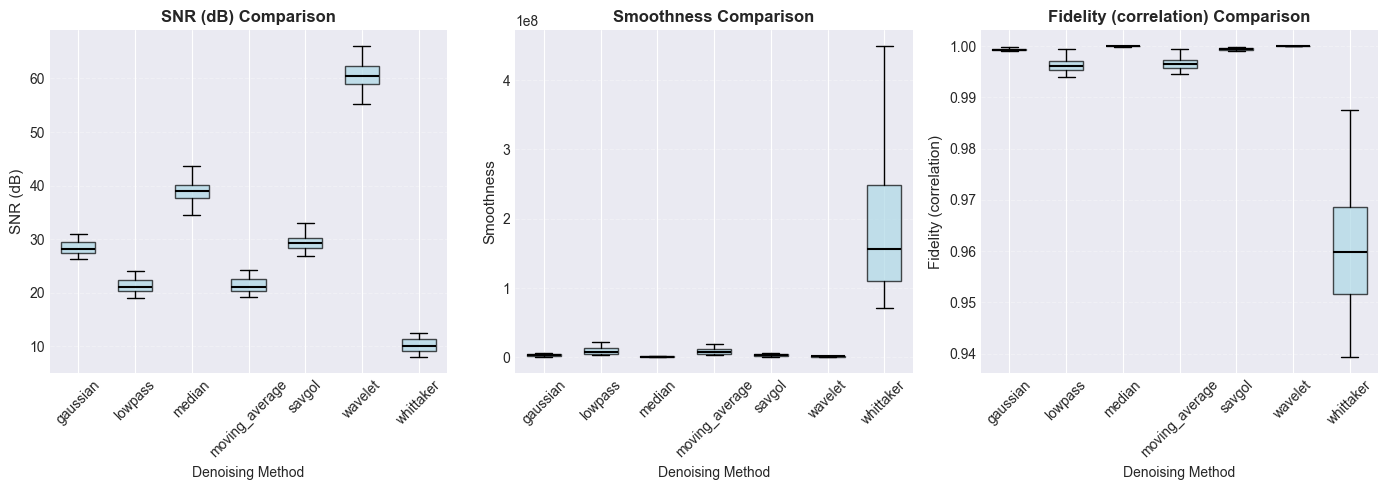

########## Plotting Denoising Evaluation Summary! ##########


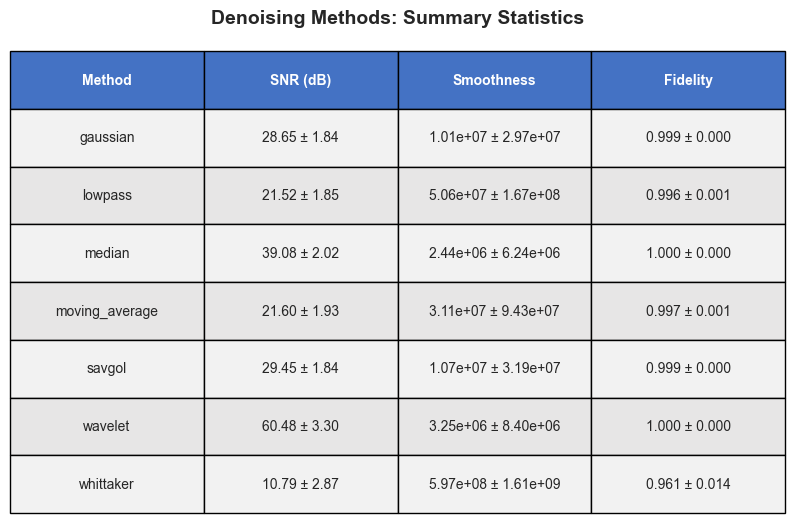


Top denoising method for HDPE: wavelet

[2/6] Evaluating polymer type: LDPE
Number of samples for LDPE: 500


denoise eval: 100%|██████████| 50/50 [00:00<00:00, 1908.77it/s]

########## Plotting Denoising Evaluation! ##########


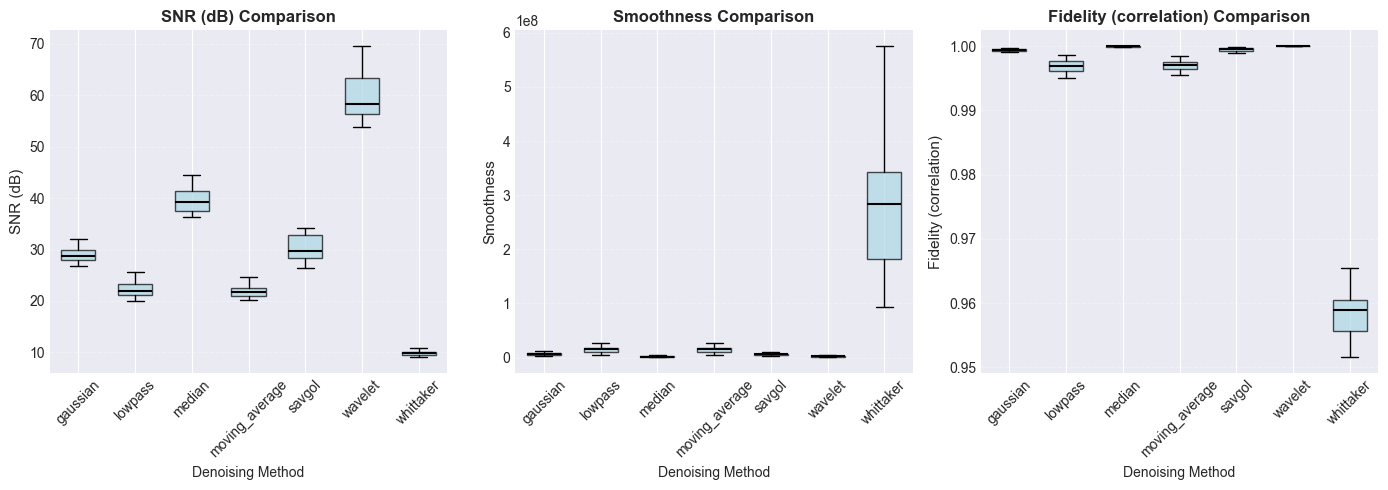

########## Plotting Denoising Evaluation Summary! ##########


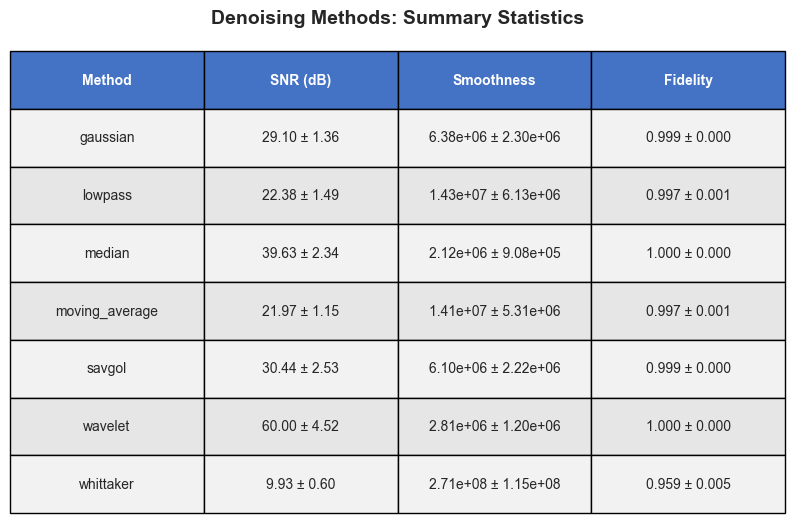


Top denoising method for LDPE: wavelet

[3/6] Evaluating polymer type: PET
Number of samples for PET: 500


denoise eval: 100%|██████████| 50/50 [00:00<00:00, 1308.52it/s]

########## Plotting Denoising Evaluation! ##########


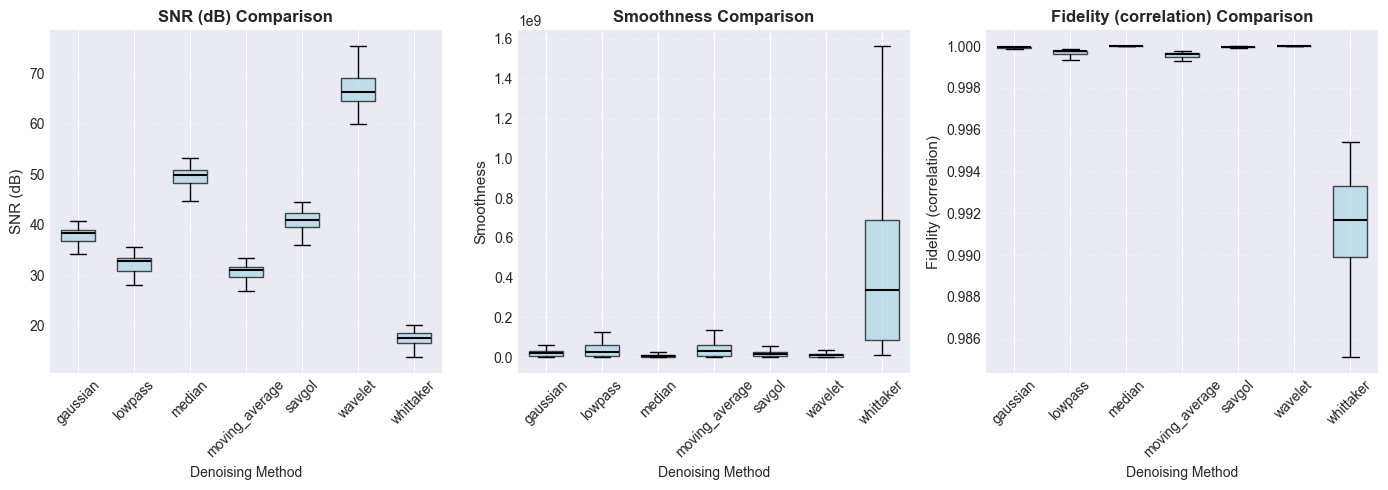

########## Plotting Denoising Evaluation Summary! ##########


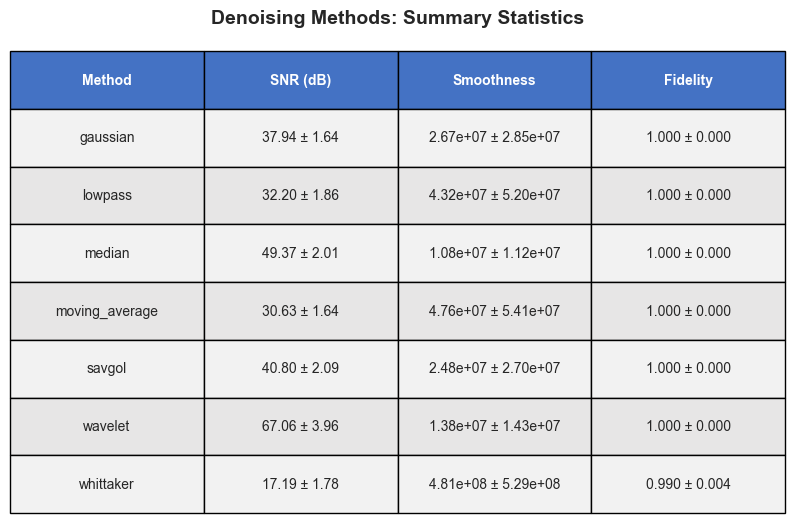


Top denoising method for PET: wavelet

[4/6] Evaluating polymer type: PP
Number of samples for PP: 500


denoise eval: 100%|██████████| 50/50 [00:00<00:00, 1315.58it/s]

########## Plotting Denoising Evaluation! ##########


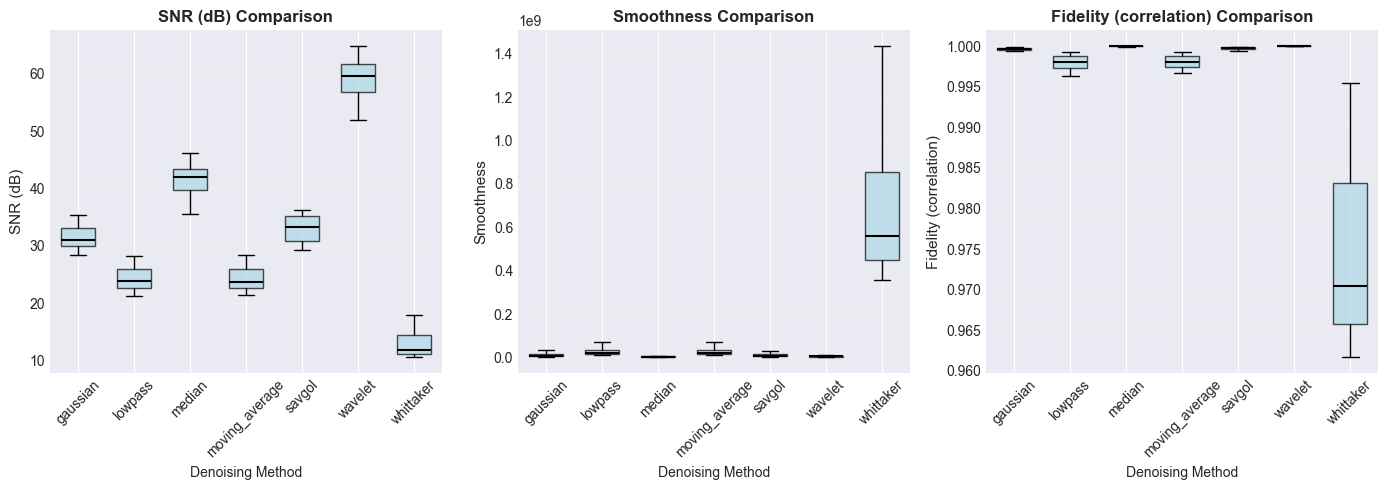

########## Plotting Denoising Evaluation Summary! ##########


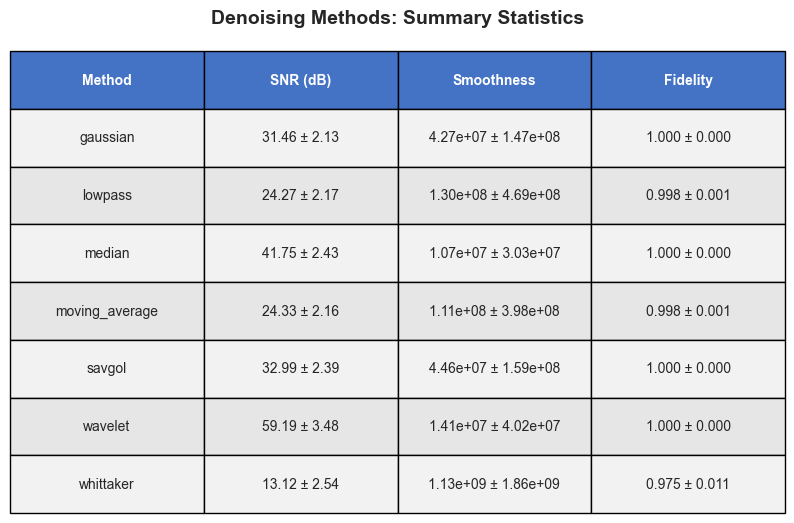


Top denoising method for PP: wavelet

[5/6] Evaluating polymer type: PS
Number of samples for PS: 500


denoise eval: 100%|██████████| 50/50 [00:00<00:00, 1563.38it/s]

########## Plotting Denoising Evaluation! ##########


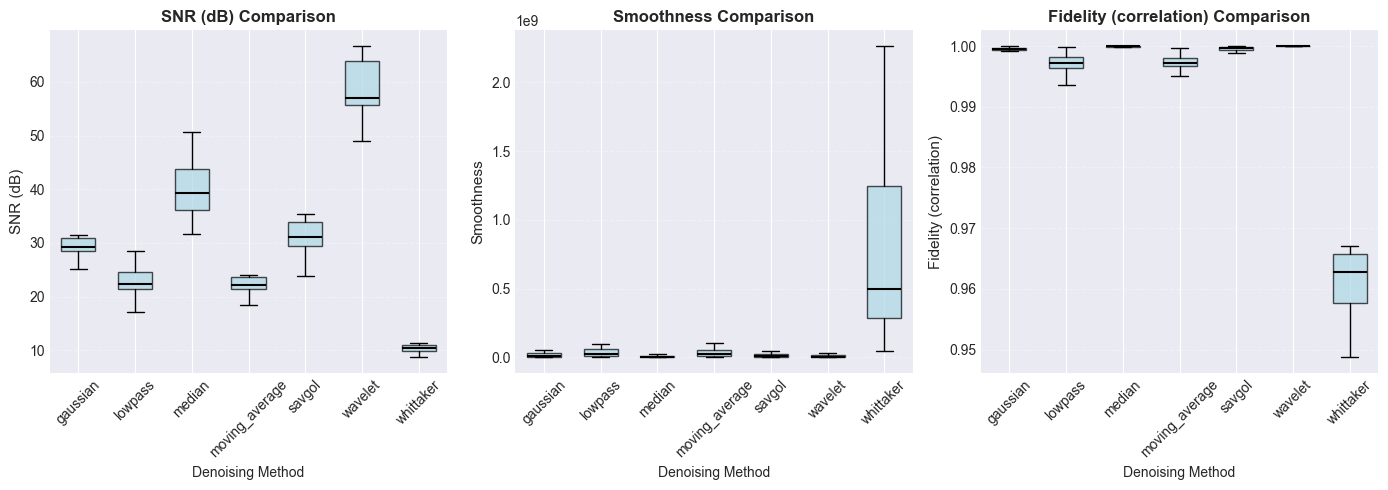

########## Plotting Denoising Evaluation Summary! ##########


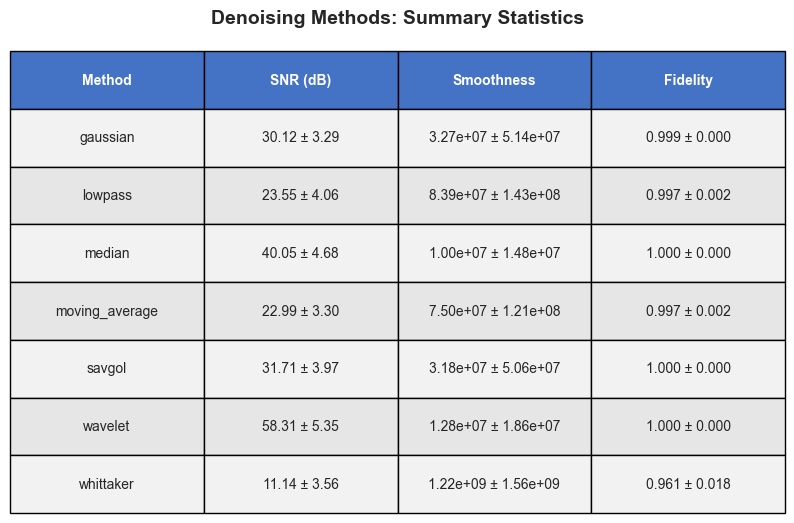


Top denoising method for PS: wavelet

[6/6] Evaluating polymer type: PVC
Number of samples for PVC: 500


denoise eval: 100%|██████████| 50/50 [00:00<00:00, 1339.37it/s]

########## Plotting Denoising Evaluation! ##########


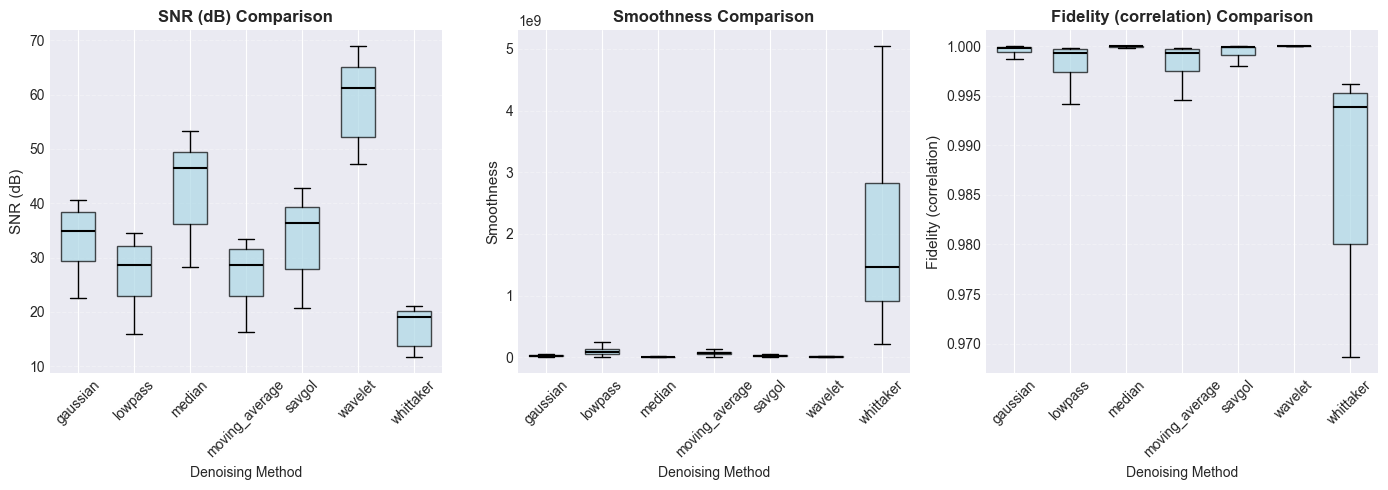

########## Plotting Denoising Evaluation Summary! ##########


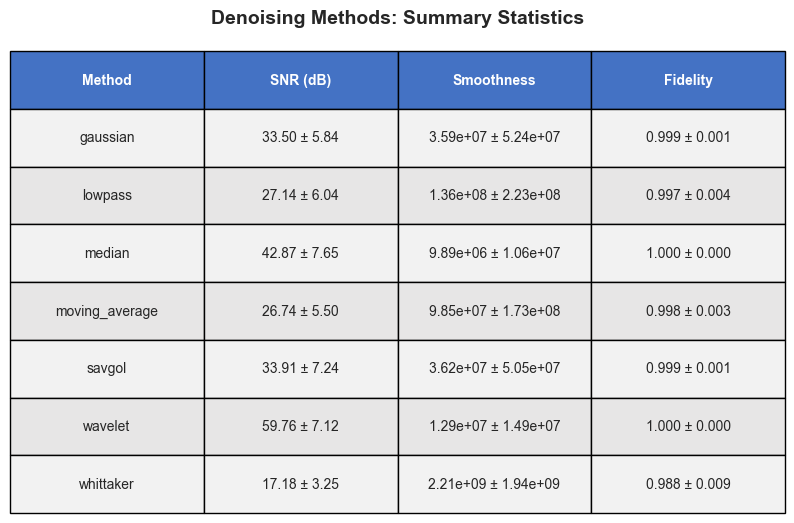


Top denoising method for PVC: wavelet

Combining results from all polymer types...

Results saved to: denoising_methods_scores.xlsx
Total evaluations: 42 (top methods for each of 6 polymer types)

SUMMARY: Top recommended method for each polymer type
HDPE                 → wavelet         (Median SNR: 60.48, Median Smoothness: 1.4e+06, Median Fidelity: 1.000000)
LDPE                 → wavelet         (Median SNR: 58.28, Median Smoothness: 2.4e+06, Median Fidelity: 0.999999)
PET                  → wavelet         (Median SNR: 66.23, Median Smoothness: 9.1e+06, Median Fidelity: 1.000000)
PP                   → wavelet         (Median SNR: 59.67, Median Smoothness: 4.9e+06, Median Fidelity: 0.999999)
PS                   → wavelet         (Median SNR: 56.95, Median Smoothness: 3.9e+06, Median Fidelity: 0.999999)
PVC                  → wavelet         (Median SNR: 61.30, Median Smoothness: 8.2e+06, Median Fidelity: 1.000000)


In [3]:
# Import required libraries for data handling
import pandas as pd
import polars as pl

# Check if data is in Polars or Pandas format
is_polars = isinstance(df_abs, pl.DataFrame)

# Get unique polymer types from the dataset
if is_polars:
    labels = df_abs.get_column(LABEL_COLUMN).unique().sort().to_list()
else:
    labels = df_abs[LABEL_COLUMN].sort_values().unique().tolist()

print(f"Found {len(labels)} polymer types: {labels}")
print("\n" + "="*80)
print("Starting denoising method evaluation for each polymer type...")
print("="*80 + "\n")

# Store results for all polymer types
all_results = []

# Evaluate denoising methods for each polymer type separately
for i, label in enumerate(labels, 1):
    print(f"\n{'='*80}")
    print(f"[{i}/{len(labels)}] Evaluating polymer type: {label}")
    print(f"{'='*80}")
    
    # Filter data for current polymer type
    if is_polars:
        df_label = df_abs.filter(pl.col(LABEL_COLUMN) == label)
    else:
        df_label = df_abs[df_abs[LABEL_COLUMN] == label]
    
    print(f"Number of samples for {label}: {len(df_label)}")
    
    # Evaluate all FTIR-specific denoising methods
    # n_samples=50 means we'll test on 50 random samples (faster than testing all)
    # methods="FTIR" uses the recommended methods for FTIR spectroscopy
    denof = fdp.find_denoising_method(
        data=df_label,
        methods="FTIR",
        n_samples=50
    )
    
    # Rank methods based on multiple criteria
    # These thresholds are recommended values:
    # - snr_min=10: Minimum signal-to-noise ratio
    # - smoothness_min=1e3: Minimum smoothness score
    # - fidelity_min=0.9: Minimum fidelity (signal preservation)
    # - time_max_ms=100.0: Maximum processing time per spectrum
    # - top_n=7: Return top 7 methods
    result = fdp.best_denoising_methods(
        eval_df=denof,
        snr_min=10,
        smoothness_min=1e3,
        fidelity_min=0.9,
        time_max_ms=100.0,
        top_n=7
    )
    
    # Add polymer type to results
    result = result.copy()
    result[LABEL_COLUMN] = label
    all_results.append(result)
    
    print(f"\nTop denoising method for {label}: {result.iloc[0]['method']}")

# Combine results from all polymer types
print("\n" + "="*80)
print("Combining results from all polymer types...")
print("="*80)

final_df = pd.concat(all_results, ignore_index=True)

# Save results to Excel file for further analysis
output_file = 'denoising_methods_scores.xlsx'
final_df.to_excel(output_file, index=False)

print(f"\nResults saved to: {output_file}")
print(f"Total evaluations: {len(final_df)} (top methods for each of {len(labels)} polymer types)")

# Display summary
print("\n" + "="*80)
print("SUMMARY: Top recommended method for each polymer type")
print("="*80)
for label in labels:
    top_method = final_df[final_df[LABEL_COLUMN] == label].iloc[0]
    print(f"{label:20s} → {top_method['method']:15s} (Median SNR: {top_method['median_snr_db']:.2f}, "
          f"Median Smoothness: {top_method['median_smoothness']:.1e}, Median Fidelity: {top_method['median_fidelity']:.6f})")

### Understanding the Results

The evaluation process:

1. **Tests each denoising method** on 50 random samples from each polymer type
2. **Calculates metrics** (SNR, smoothness, fidelity, processing time)
3. **Ranks methods** based on your specified criteria
4. **Saves results** to an Excel file for detailed analysis

### How to Interpret the Metrics

- **SNR (Signal-to-Noise Ratio)**: 
  - Higher is better
  - Values >10 are good, >20 are excellent
  - Indicates how much signal vs. noise remains after denoising

- **Smoothness**: 
  - Higher values indicate smoother spectra
  - Values >1e3 (1000) are recommended
  - Too much smoothness might remove real spectral features

- **Fidelity**: 
  - Ranges from 0 to 1 (1 is perfect preservation)
  - Values >0.9 recommended
  - Measures how well the original signal is preserved

- **Processing Time**: 
  - Time per spectrum in milliseconds
  - Important if processing large datasets
  - <100ms is generally acceptable

### Next Steps

1. **Review the Excel file** `denoising_methods_scores.xlsx` to see detailed rankings
2. **Check if one method works well across all polymer types** (this is ideal for consistency)
3. **Choose your denoising method** based on the summary above
4. **Apply the selected method** in your preprocessing pipeline using:
   ```python
   fdp.denoise_spect(method="savgol")  # Replace "savgol" with your chosen method
   ```

### Tips for Method Selection

- If **different polymer types favor different methods**, consider:
  - Using the most common top-ranked method
  - Or processing each polymer type separately
- If **Savitzky-Golay (savgol)** appears frequently, it's often the best general-purpose choice
- If **processing time is critical**, prefer faster methods (median, gaussian)
- If **maximum noise reduction is needed**, prefer methods with highest SNR

---

## Conclusion

You've now systematically evaluated all denoising methods! The results are saved and ready for use in your preprocessing pipeline. Proceed to Notebook 2 to evaluate baseline correction methods.